# Edge Computing and Nearables in Clinical Motion Analysis
Alireza Rafiei - Fall 2022 - HW13

#### In this assignment, we aim to run Mediapipe for pose detection tasks. In this regard, a short human activity video is selected, and Mediapipe is applied for pose detection and tracking. 

#### Mediapipe and OpenCV libraries are installed and imported for pose detection and tracking of human activity.

In [ ]:
# Importing libraries
import cv2
import mediapipe as mp

In [ ]:
# Setup
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

#### One random frame of the input video:

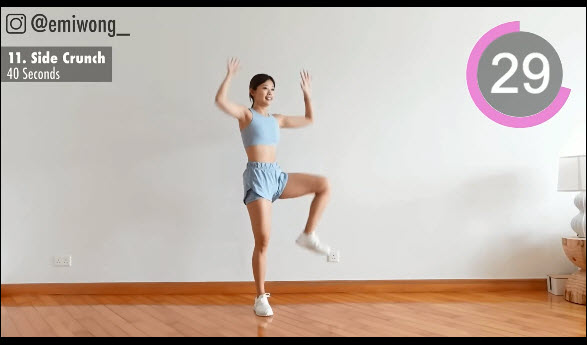

#### In the first step, the video file should be read. Next, I grab the width, height, and fps of the video. Having initialized parameters for writing manipulated video, "min_detection_confidence" and "min_tracking_confidence" are defined. Afterward, I started to read every single frame of the input video and applied pre-defined machine learning models of the Mediapipe library. Drawing the detected pose on the frames and putting them to gather for constructing the output video are the final steps.

In [ ]:
# initialize the video stream
video_cap = cv2.VideoCapture("HW13.mp4")

# grab the width, height, and fps of the frames in the video stream.
frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_cap.get(cv2.CAP_PROP_FPS))

# initialize the FourCC and a video writer object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output = cv2.VideoWriter('output_pose.mp4', fourcc, fps, (frame_width, frame_height))

with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    
  while True:
    success, image = video_cap.read()

    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())


    # write the frame to the output file
    output.write(image)
    if cv2.waitKey(20) == ord('q'):
        break
video_cap.release()
cv2.destroyAllWindows()

#### The following image is the corresponding frame after applying the Mediapipe of the previous image.

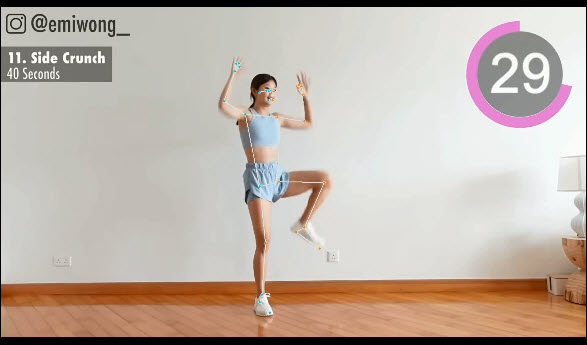

#### The input video and output video after utilizing Mediapipe and OpenCv libraries of a random human activity are attached to this file.